# LSTM - EEG Emotion Detection:

In [108]:
import numpy as np;
import pandas as pd;
import seaborn as sns;

In [109]:
df = pd.read_csv("./emotions.csv") # loading the EEG data
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [110]:
print(df.info())
print("shape:", df.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB
None
shape: (2132, 2549)


In [111]:
df.isnull().sum() # There is no null values

# mean_0_a     0
mean_1_a       0
mean_2_a       0
mean_3_a       0
mean_4_a       0
mean_d_0_a     0
mean_d_1_a     0
mean_d_2_a     0
mean_d_3_a     0
mean_d_4_a     0
mean_d_0_a2    0
mean_d_1_a2    0
mean_d_2_a2    0
mean_d_3_a2    0
mean_d_4_a2    0
mean_d_5_a     0
mean_d_6_a     0
mean_d_7_a     0
mean_d_8_a     0
mean_d_9_a     0
mean_d_10_a    0
mean_d_11_a    0
mean_d_12_a    0
mean_d_13_a    0
mean_d_14_a    0
mean_d_15_a    0
mean_d_16_a    0
mean_d_17_a    0
mean_d_18_a    0
mean_d_19_a    0
              ..
fft_721_b      0
fft_722_b      0
fft_723_b      0
fft_724_b      0
fft_725_b      0
fft_726_b      0
fft_727_b      0
fft_728_b      0
fft_729_b      0
fft_730_b      0
fft_731_b      0
fft_732_b      0
fft_733_b      0
fft_734_b      0
fft_735_b      0
fft_736_b      0
fft_737_b      0
fft_738_b      0
fft_739_b      0
fft_740_b      0
fft_741_b      0
fft_742_b      0
fft_743_b      0
fft_744_b      0
fft_745_b      0
fft_746_b      0
fft_747_b      0
fft_748_b     

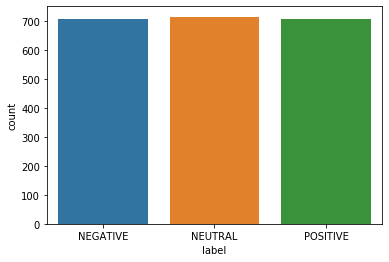

In [112]:
ns.countplot(x = "label", data = df ) # This shows the count of each of the classes

In [113]:
x=df.drop(["label"]  ,axis=1)
x.shape
x.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [126]:
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} ) # converting the categorical to numerical
df = df.replace(encode)
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [127]:
y = df.loc[:, "label"].values
print(y.shape)
y

(2132,)


array([2, 0, 1, ..., 2, 2, 0], dtype=int64)

### Normalization:

In [128]:
from sklearn.preprocessing import StandardScaler # performing Normalization using StandardScalar
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [129]:
x

array([[-0.69608594,  0.35491199, -1.21724379, ..., -1.06084278,
        -1.06084278,  0.91015287],
       [ 0.88626748,  0.65719091,  0.66420935, ...,  0.16401498,
         0.16401498, -0.45550631],
       [-0.41600022,  0.25775091, -1.50819016, ..., -0.92933964,
        -0.92933964,  0.91507541],
       ...,
       [-1.03421746,  0.13899848, -0.74688051, ...,  0.36220899,
         0.36220899, -1.30006583],
       [ 0.10098042, -0.76783828, -0.88750458, ..., -2.0846886 ,
        -2.0846886 ,  2.24908269],
       [ 0.76847442,  0.53843848,  0.66323953, ...,  0.67499859,
         0.67499859, -0.50118745]])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state= 44)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[ 0.76847442  0.40889037  0.63317507 ...  0.33121183  0.33121183
  -0.4687627 ]
 [-1.39106498 -3.02845278  0.58710856 ...  0.35751245  0.35751245
  -0.42272222]
 [ 1.13494171  0.75435199  0.63559962 ...  0.46220773  0.46220773
  -0.46366296]
 ...
 [ 0.22531754  0.20377253 -0.03406192 ... -0.01445355 -0.01445355
  -0.16296   ]
 [-0.10842946 -0.47635504 -0.24742259 ... -0.01539286 -0.01539286
  -0.67145797]
 [-0.96635557 -1.80422316  0.62881087 ...  0.3509373   0.3509373
  -0.33426425]]
[[-0.2916631   0.40889037  0.69039452 ...  0.55946369  0.55946369
  -0.5449488 ]
 [ 0.63759324  0.4412774   0.69039452 ...  0.47455024  0.47455024
  -0.43547159]
 [ 0.87972342  0.60321253  0.66275462 ...  0.24103825  0.24103825
  -0.53018119]
 ...
 [ 0.02245172  0.5276428   0.61232391 ...  0.34436214  0.34436214
  -0.34804735]
 [-1.10639842 -2.06871721  0.61280882 ...  0.37535931  0.37535931
  -0.30374453]
 [-0.20004628  0.40889037 -1.81368384 ... -0.95751889 -0.95751889
   0.91015287]]
[0 1 0 ... 2 2 1]

In [132]:
x_train = np.reshape(x_train, (x_train.shape[0],1,x.shape[1])) # reshaping the input to fed into the LSTM network
x_test = np.reshape(x_test, (x_test.shape[0],1,x.shape[1]))

## LSTM Model:

In [133]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout



In [149]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(LSTM(64, input_shape = (1,2548), activation = "relu", return_sequences = "True"))
model.add(Dropout(0.4))
model.add(LSTM(32, activation = "sigmoid"))
model.add(Dropout(0.4))
model.add(Dense(3, activation = "sigmoid"))
from keras.optimizers import SGD
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 64)             668928    
_________________________________________________________________
dropout (Dropout)            (None, 1, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 99        
Total params: 681,443
Trainable params: 681,443
Non-trainable params: 0
_________________________________________________________________


### Model Training: 

In [151]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)


Train on 1428 samples, validate on 704 samples
Epoch 1/100
1428/1428 [==============================] - 1s 517us/sample - loss: 0.3408 - acc: 0.9272 - val_loss: 0.2833 - val_acc: 0.9375
Epoch 2/100
1428/1428 [==============================] - 1s 688us/sample - loss: 0.3017 - acc: 0.9321 - val_loss: 0.2612 - val_acc: 0.9375
Epoch 3/100
1428/1428 [==============================] - 1s 765us/sample - loss: 0.2899 - acc: 0.9279 - val_loss: 0.2297 - val_acc: 0.9432
Epoch 4/100
1428/1428 [==============================] - 1s 529us/sample - loss: 0.2695 - acc: 0.9314 - val_loss: 0.2247 - val_acc: 0.9361
Epoch 5/100
1428/1428 [==============================] - 1s 548us/sample - loss: 0.2315 - acc: 0.9433 - val_loss: 0.2068 - val_acc: 0.9474
Epoch 6/100
1428/1428 [==============================] - 1s 753us/sample - loss: 0.2232 - acc: 0.9454 - val_loss: 0.2052 - val_acc: 0.9375
Epoch 7/100
1428/1428 [==============================] - 1s 755us/sample - loss: 0.2193 - acc: 0.9440 - val_loss: 0.184

1428/1428 [==============================] - 1s 747us/sample - loss: 0.0246 - acc: 0.9951 - val_loss: 0.1674 - val_acc: 0.9688
Epoch 60/100
1428/1428 [==============================] - 1s 755us/sample - loss: 0.0254 - acc: 0.9958 - val_loss: 0.2105 - val_acc: 0.9645
Epoch 61/100
1428/1428 [==============================] - 1s 757us/sample - loss: 0.0282 - acc: 0.9930 - val_loss: 0.1549 - val_acc: 0.9730
Epoch 62/100
1428/1428 [==============================] - 1s 731us/sample - loss: 0.0231 - acc: 0.9958 - val_loss: 0.1408 - val_acc: 0.9730
Epoch 63/100
1428/1428 [==============================] - 1s 677us/sample - loss: 0.0210 - acc: 0.9979 - val_loss: 0.1610 - val_acc: 0.9688
Epoch 64/100
1428/1428 [==============================] - 1s 627us/sample - loss: 0.0138 - acc: 0.9986 - val_loss: 0.1614 - val_acc: 0.9688
Epoch 65/100
1428/1428 [==============================] - 1s 759us/sample - loss: 0.0210 - acc: 0.9979 - val_loss: 0.1915 - val_acc: 0.9688
Epoch 66/100
1428/1428 [=========

### Predicting the Emotions:

In [152]:
pred = model.predict(x_test)
print(pred)

[[8.2067895e-01 2.1600723e-04 9.8854303e-05]
 [8.2061028e-01 2.1609664e-04 9.8884106e-05]
 [8.2071912e-01 2.1600723e-04 9.8764896e-05]
 ...
 [8.2071376e-01 2.1600723e-04 9.8824501e-05]
 [6.8008900e-05 8.0909491e-01 4.3484569e-04]
 [5.9217215e-05 5.9664249e-04 7.1335816e-01]]


### Model Accuracy:

In [153]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.30%
